In [47]:
# imports
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [67]:
path = Path(r"/home/zr/code/trading_project/exploratory_analysis/Prosperity2Data/round-2-island-data-bottle")
# get price data for previous days

days = [-1, 0, 1] # not getting data for day 0 because that can be used as a holdout

prices= {}
for day in days:
    
    prices[day]= pd.read_csv(path / Path(f"prices_round_2_day_{day}.csv"), sep=";")


trading_data = pd.concat(prices[day] for day in [-1, 0]).reset_index()
trading_data

test_data = prices[1]

In [68]:
trading_data

,index,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
0,0,0,1200.00,1.5,10.5,-2.0,2500.0000,79.000000,-1
1,1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.004100,-1
2,2,200,1201.75,1.5,9.5,-2.0,2498.8457,79.008210,-1
3,3,300,1201.75,1.5,9.5,-2.0,2498.2780,79.012340,-1
4,4,400,1201.75,1.5,9.5,-2.0,2497.7166,79.016490,-1
...,...,...,...,...,...,...,...,...,...
19997,9996,999600,988.25,1.3,10.5,-2.6,1703.5710,64.989100,0
19998,9997,999700,988.00,1.3,10.5,-2.6,1702.6835,64.991806,0
19999,9998,999800,988.75,1.3,10.5,-2.6,1701.7925,64.994530,0
20000,9999,999900,986.75,1.3,10.5,-2.6,1700.8980,64.997260,0


In [49]:
trading_data.describe()

,index,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
count,20002.000000,20002.000000,20002.000000,20002.000000,20002.000000,20002.000000,20002.000000,20002.000000,20002.000000
mean,5000.000000,500000.000000,1125.027960,1.392511,10.016098,-2.580492,2949.641728,79.828966,-0.500000
std,2887.112178,288711.217814,91.002175,0.194979,1.494851,0.316784,964.719080,9.889153,0.500012
min,0.000000,0.000000,960.750000,1.100000,8.500000,-4.200000,1397.304900,59.999580,-1.000000
25%,2500.000000,250000.000000,1039.250000,1.300000,9.500000,-2.600000,2000.000000,70.277466,-1.000000
50%,5000.000000,500000.000000,1134.375000,1.300000,9.500000,-2.600000,2981.086400,82.979485,-0.500000
75%,7500.000000,750000.000000,1209.750000,1.500000,10.500000,-2.400000,3811.437200,87.501333,0.000000
max,10000.000000,1000000.000000,1257.250000,2.100000,19.500000,-2.000000,4513.986300,95.209755,0.000000


In [21]:
test_data

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
0,0,1098.25,0.9,10.5,-5.0,2100.0000,70.000000,1
1,100,1098.25,0.9,9.5,-5.0,2099.7570,70.022710,1
2,200,1096.75,0.9,9.5,-5.0,2099.5132,70.045395,1
3,300,1097.00,0.9,9.5,-5.0,2099.2683,70.068030,1
4,400,1097.25,0.9,9.5,-5.0,2099.0225,70.090640,1
...,...,...,...,...,...,...,...,...
9996,999600,1036.25,0.9,9.5,-5.0,2299.9436,69.935490,1
9997,999700,1036.25,0.9,9.5,-5.0,2299.9556,69.951530,1
9998,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.967620,1
9999,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.983780,1


array([[<Axes: title={'center': 'ORCHIDS'}>,
        <Axes: title={'center': 'TRANSPORT_FEES'}>],
       [<Axes: title={'center': 'EXPORT_TARIFF'}>,
        <Axes: title={'center': 'IMPORT_TARIFF'}>],
       [<Axes: title={'center': 'SUNLIGHT'}>,
        <Axes: title={'center': 'HUMIDITY'}>]], dtype=object)

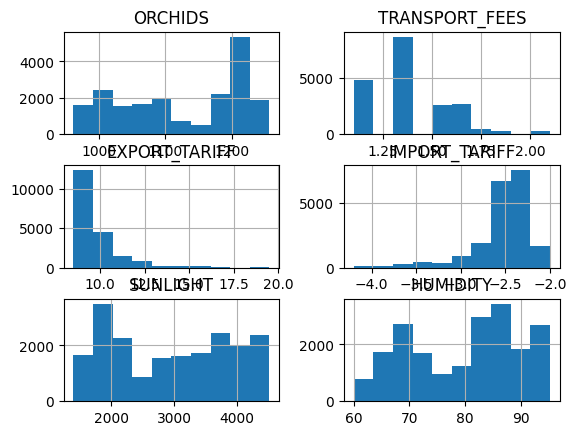

In [61]:
trading_data[["ORCHIDS", "TRANSPORT_FEES", "EXPORT_TARIFF", "IMPORT_TARIFF", "SUNLIGHT", "HUMIDITY"]].hist()

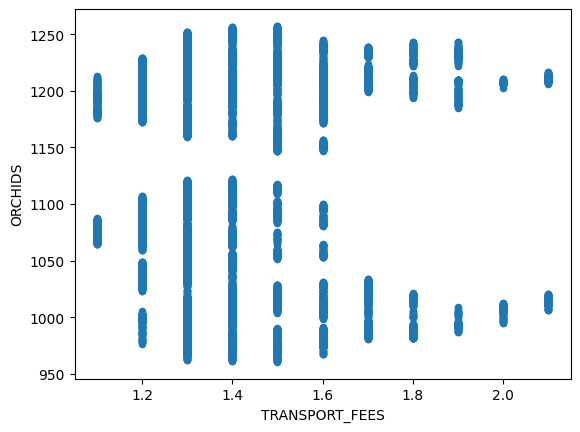

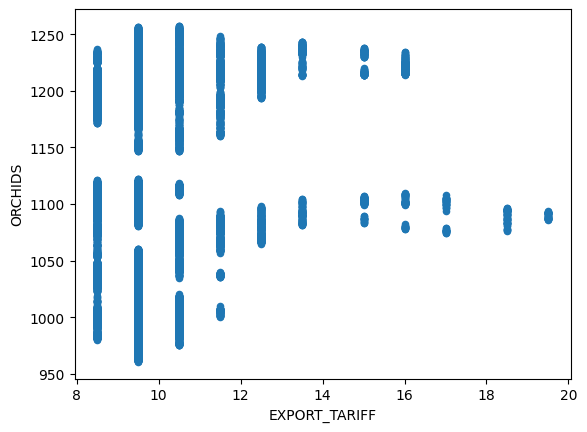

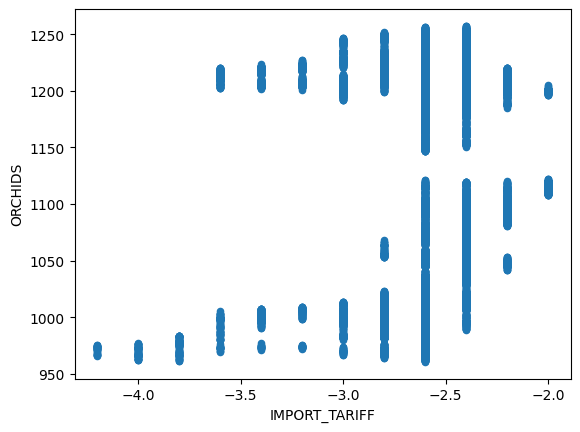

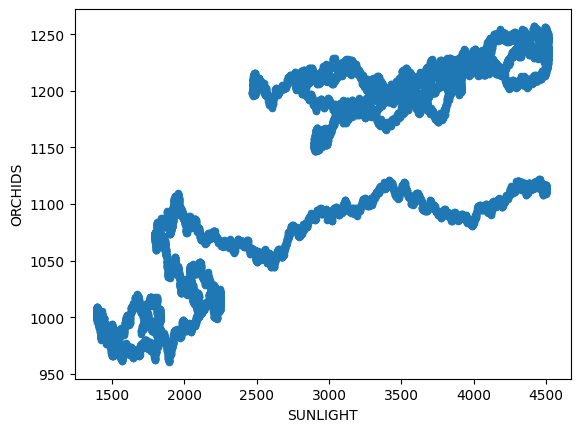

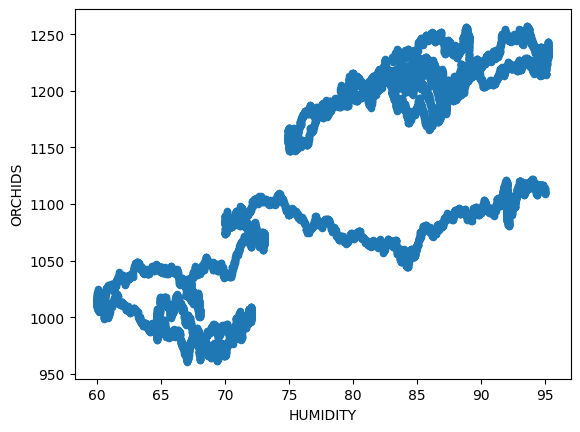

In [59]:
independents= ["TRANSPORT_FEES", "EXPORT_TARIFF", "IMPORT_TARIFF", "SUNLIGHT", "HUMIDITY"]
dependent = "ORCHIDS"
for independent in independents:
    trading_data[[dependent, independent]].plot.scatter(x=independent,
                                                        y=dependent)

KeyError: 'TIMESTAMP'

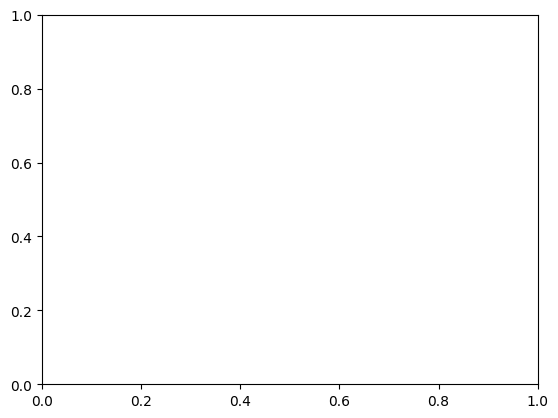

In [70]:
independents= ["TRANSPORT_FEES", "EXPORT_TARIFF", "IMPORT_TARIFF", "SUNLIGHT", "HUMIDITY"]
dependent = "ORCHIDS"
for independent in independents:
    trading_data.plot.scatter(x="timestamp", y=independent)

In [10]:
trading_data[["ORCHIDS", "TRANSPORT_FEES", "EXPORT_TARIFF", "IMPORT_TARIFF", "SUNLIGHT", "HUMIDITY"]].corr()

,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY
ORCHIDS,1.000000,-0.048194,0.114042,0.133033,0.834294,0.774141
TRANSPORT_FEES,-0.048194,1.000000,0.013108,-0.106232,-0.003862,-0.077130
EXPORT_TARIFF,0.114042,0.013108,1.000000,0.077108,0.047848,0.039943
IMPORT_TARIFF,0.133033,-0.106232,0.077108,1.000000,0.151188,0.183216
SUNLIGHT,0.834294,-0.003862,0.047848,0.151188,1.000000,0.870618
HUMIDITY,0.774141,-0.077130,0.039943,0.183216,0.870618,1.000000


We can see that orchids is stronly correlated with sunlight and humidity

Lets do a linear regression and see what the fit is like

In [ ]:
Let's start with a linear regression over all the variables, and then compare it with a linear regression with only sunlught and humidity

In [38]:
from sklearn.linear_model import LinearRegression


regression = LinearRegression()

y = trading_data[["ORCHIDS"]]
x = trading_data[["TRANSPORT_FEES", "EXPORT_TARIFF", "IMPORT_TARIFF", "SUNLIGHT", "HUMIDITY"]]

regression.fit(x, y)


from sklearn.metrics import mean_squared_error, r2_score


test_x = test_data[["TRANSPORT_FEES", "EXPORT_TARIFF", "IMPORT_TARIFF", "SUNLIGHT", "HUMIDITY"]]
test_y = test_data["ORCHIDS"]
pred = regression.predict(test_x)

# The coefficients
print("Coefficients: \n", regression.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(test_y, pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(test_y, pred))

# # Plot outputs
# plt.scatter(test_x, test_y, color="black")
# plt.plot(test_x, pred, color="blue", linewidth=3)

# plt.xticks(())
# plt.yticks(())

# plt.show()

Coefficients: 
 [[-15.49648202   4.62083828  -3.45084847   0.06287601   1.75244366]]
Mean squared error: 4513.84
Coefficient of determination: -4.33


In [ ]:
Lets try with only sunlight and humidity

In [42]:
from sklearn.linear_model import LinearRegression


regression = LinearRegression()

y = trading_data[["ORCHIDS"]]
x = trading_data[["SUNLIGHT", "HUMIDITY"]]
regression.fit(x, y)


from sklearn.metrics import mean_squared_error, r2_score


test_x = test_data[["SUNLIGHT", "HUMIDITY"]]
test_y = test_data["ORCHIDS"]
pred = regression.predict(test_x)

# The coefficients
print("Coefficients: \n", regression.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(test_y, pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(test_y, pred))

# # Plot outputs
# plt.scatter(test_x, test_y, color="black")
# plt.plot(test_x, pred, color="blue", linewidth=3)

# plt.xticks(())
# plt.yticks(())

# plt.show()

Coefficients: 
 [[0.06248273 1.81705806]]
Mean squared error: 3772.21
Coefficient of determination: -3.45


In [ ]:
Let's have a look at applying some transformations

In [52]:
from numpy import sign, sqrt
from sklearn.linear_model import LinearRegression



y = trading_data[["ORCHIDS"]]
x = trading_data[["TRANSPORT_FEES", "EXPORT_TARIFF", "IMPORT_TARIFF", "SUNLIGHT", "HUMIDITY"]]

# Import is rightly skewed so you want to apply sqrt() to it
x["IMPORT_TARIFF"] = sqrt(abs(x["IMPORT_TARIFF"])) * sign(x["IMPORT_TARIFF"])

# Export is left skewed so you want to apply x^2
x["EXPORT_TARIFF"] = x["EXPORT_TARIFF"]**2

# Do regression
regression = LinearRegression()
regression.fit(x, y)


from sklearn.metrics import mean_squared_error, r2_score


test_x = test_data[["TRANSPORT_FEES", "EXPORT_TARIFF", "IMPORT_TARIFF", "SUNLIGHT", "HUMIDITY"]]
test_y = test_data["ORCHIDS"]
pred = regression.predict(test_x)

# The coefficients
print("Coefficients: \n", regression.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(test_y, pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(test_y, pred))

# # Plot outputs
# plt.scatter(test_x, test_y, color="black")
# plt.plot(test_x, pred, color="blue", linewidth=3)

# plt.xticks(())
# plt.yticks(())

# plt.show()

Coefficients: 
 [[-15.84696368   0.19208746 -18.19175219   0.06333195   1.72305216]]
Mean squared error: 9184.57
Coefficient of determination: -9.85


/tmp/ipykernel_6387/3855533016.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["IMPORT_TARIFF"] = sqrt(abs(x["IMPORT_TARIFF"])) * sign(x["IMPORT_TARIFF"])
/tmp/ipykernel_6387/3855533016.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["EXPORT_TARIFF"] = x["EXPORT_TARIFF"]**2


In [ ]:
Looks like the model got worse